# B2B Sales AI Agent - Sales Workflow Optimizer

An AI-powered B2B sales assistant that analyzes customer calls, extracts key insights, and automates follow-up actions to accelerate deal cycles.

## Overview

- This tutorial and notebook file is aimed at showcasing an AI-powered B2B sales assistant that analyzes sales calls, extracts key insights, and automates follow-up actions.  
- It demonstrates features like sentiment analysis, competitor detection, and confidence scoring using LLM pipelines.  
- The system is orchestrated using **LangGraph, integrating speech-to-text, email automation, and knowledge retrieval workflows**.

## Business Value Proposition

- Reduce sales follow-up time by 60-80%
- Increase competitive win rates through timely responses
- Improve deal consistency with standardized processes
- Enhance customer experience with hyper-personalized content
- Provide management with real-time deal insights

**GOAL IS REDUCE THIS TO THIS**

<p float="left">
  <img src="https://www-cms.pipedriveassets.com/futurama-sales-meme.png" height = "350" width="300" />
  <img src="https://img.freepik.com/premium-vector/green-long-arrow-vector-illustration-eps-10-stock-image_213497-2917.jpg" width="100" />
  <img src="https://smartreach.io/blog/wp-content/uploads/2023/12/image-21.jpeg" height = "600" width="300" />
</p>

# Agent Workflow

## Setup

### Installing Libraries to Environment

In [9]:
#!pip install "langchain-core<0.3,>=0.1.52" "protobuf<5,>=3.20" langgraph-prebuilt langgraph-sdk langgraph-checkpoint-sqlite langsmith langchain-community langchain-openai typing
#!pip install langchain-google-genai

#!pip install "pydantic<2.0"

#!pip install --upgrade langchain-openai

### Importing Libraries

In [12]:
#pip install --upgrade pydantic

In [20]:
import os
import pandas as pd
from datetime import datetime, timedelta
from typing import List, TypedDict
from pydantic import BaseModel, Field

# LangChain & LangGraph Libraries
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display, Markdown, HTML

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain import PromptTemplate

from langchain_google_genai import ChatGoogleGenerativeAI

from typing import Optional
from typing import Annotated
from operator import add

# Setting Up LLM API

In [16]:
OPEN_API_KEY = os.environ["OPENAI_API_KEY"]
GOOGLE_GEMINI_KEY = os.environ["GOOGLE_GEMINI_KEY"]


openai_llm = ChatOpenAI(temperature = 0.3)
google_gemini_llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest",google_api_key=GOOGLE_GEMINI_KEY)

## State Definition

In [7]:
class State(BaseModel):
    state_id: Annotated[int, add]
    transcript: str
    summarized_transcript : str
    prelim_analysis : list
    rd_consultation_flag: bool
    competitor_analysis_flag : bool
    competitors : list
    orchestrated_article_type : str
    orchestrated_article : str
    customer_reachout_trigger : str
    sales_summary_snapshot : str
    sales_database_update_flag : str
    

## Nodes Declaration

In [24]:
call_transcript_prompt = ChatPromptTemplate.from_template( 
    """
        Please provide a detailed summary of this sales call transcript.
        Focus on capturing:
            - Who was involved in the call (names and companies)
            - The customer's specific needs and pain points
            - Key product/service features discussed
            - Any technical requirements mentioned
            - Agreed next steps and deliverables
    
        Keep the summary factual and objective. Do not include:
            - Greetings and casual conversation
            - Repeated information
            - Your own analysis or recommendations

        Make sure to include content that will include
            - Competitors and how they failed delivering the feature
            - Topics, Areas and Key Words that will help the company to recommend or send customer ROIs and articles
            - The customer's specific 
    
        Present the information in a clear, structured format while maintaining important context and details from the conversation.

    Transcript:
    {transcript}
    """
    )
prompt = """
        Please provide a detailed summary of this sales call transcript.
        Focus on capturing:
            - Who was involved in the call (names and companies)
            - The customer's specific needs and pain points
            - Key product/service features discussed
            - Any technical requirements mentioned
            - Agreed next steps and deliverables
    
        Keep the summary factual and objective. Do not include:
            - Greetings and casual conversation
            - Repeated information
            - Your own analysis or recommendations

        Make sure to include content that will include
            - Competitors and how they failed delivering the feature
            - Topics, Areas and Key Words that will help the company to recommend or send customer ROIs and articles
            - The customer's specific 
    
        Present the information in a clear, structured format while maintaining important context and details from the conversation.

    Transcript:
    {transcript}
    """
response = google_gemini_llm.invoke(prompt)
response

AIMessage(content='Please provide the transcript. I need the text of the sales call to create the summary you requested.  Once you provide the transcript, I will generate a detailed summary following your specifications.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash-latest', 'safety_ratings': []}, id='run-83bec373-0fad-4433-be13-0f9c15e8d36a-0', usage_metadata={'input_tokens': 191, 'output_tokens': 38, 'total_tokens': 229, 'input_token_details': {'cache_read': 0}})

In [60]:
def call_transcript_summarization(state: dict) -> State:
    """Takes raw call transcript and generates structured summary"""
    call_transcript_prompt = ChatPromptTemplate.from_template( 
    """
        Please provide a detailed summary of this sales call transcript.
        Focus on capturing:
            - Who was involved in the call (names and companies)
            - The customer's specific needs and pain points
            - Key product/service features discussed
            - Any technical requirements mentioned
            - Agreed next steps and deliverables
    
        Keep the summary factual and objective. Do not include:
            - Greetings and casual conversation
            - Repeated information
            - Your own analysis or recommendations

        Make sure to include content that will include
            - Competitors and how they failed delivering the feature
            - Topics, Areas and Key Words that will help the company to recommend or send customer ROIs and articles
            - The customer's specific 
    
        Present the information in a clear, structured format while maintaining important context and details from the conversation.

    Transcript:
    {transcript}
    """
    )
    response = google_gemini_llm.invoke(call_transcript_prompt)
    
    return { "summarized_transcript" : [state['transcript'] + 1] } 





def followup_call_feedback(state: dict) -> State:
    """Creates follow-up action items based on call analysis"""
    return state

def llm_tool_calling(state: dict) -> State:
    """Creates follow-up action items based on call analysis"""
    return state

def sales_summary_snapshot(state: dict) -> State:
    """Creates follow-up action items based on call analysis"""
    return state

def preliminary_analysis(state: dict) -> State:
    """Performs initial sentiment/needs assessment"""
    return { "transcript" : [state['transcript'] + 1] }  

def competitor_analysis(state: dict) -> State:
    """Identifies and analyzes competitor mentions in transcript"""
    return { "transcript" : [state['transcript'] + 1] } 

def customer_roi_article_generation(state: dict) -> State:
    """Generates personalized ROI content for the customer"""
    return state

def rnd_consultation_assessment_trigger(state: dict) -> State:
    """Determines if technical consultation is needed"""
    return state

def orchestrator_node(state: dict) -> State:
    """Combines all insights and coordinates final outputs"""
    return state

def customer_reachout_node(state: dict) -> State:
    """Prepares final customer outreach materials"""
    return state

def sales_database_update(state: dict) -> State:
    """Prepares final customer outreach materials"""
    return state

## Graph

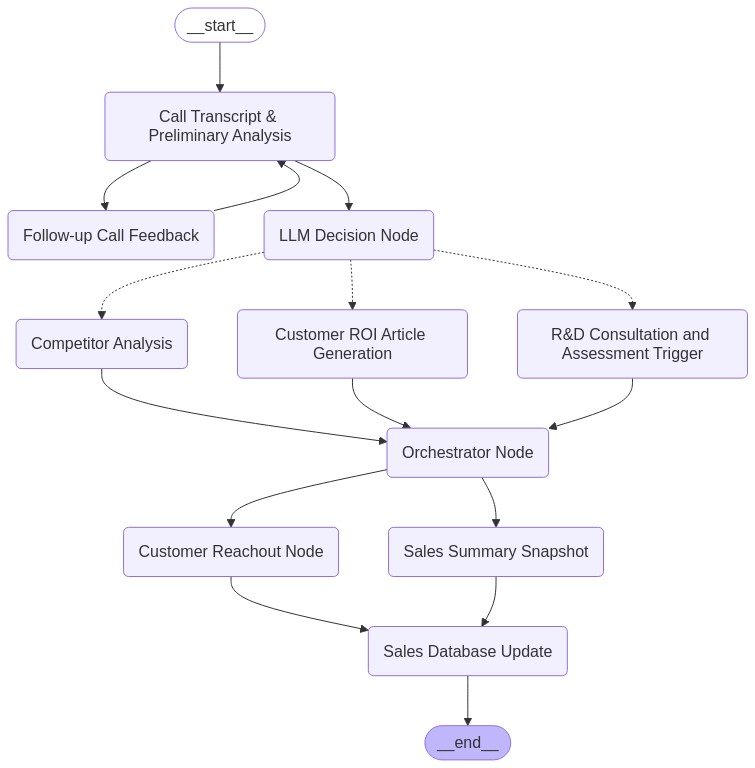

In [86]:
graph_builder  = StateGraph(State)

# Nodes
graph_builder.add_node('Call Transcript & Preliminary Analysis', call_transcript_summarization)
graph_builder.add_node('Follow-up Call Feedback', followup_call_feedback)
graph_builder.add_node('LLM Decision Node', llm_tool_calling)



graph_builder.add_node('Competitor Analysis', competitor_analysis)
graph_builder.add_node('Customer ROI Article Generation', customer_roi_article_generation)
graph_builder.add_node('R&D Consultation and Assessment Trigger', rnd_consultation_assessment_trigger)
graph_builder.add_node('Orchestrator Node', orchestrator_node)
graph_builder.add_node('Sales Summary Snapshot', sales_summary_snapshot)
graph_builder.add_node('Customer Reachout Node', customer_reachout_node)

graph_builder.add_node('Sales Database Update', sales_database_update)

# Edges
graph_builder.add_edge('Call Transcript & Preliminary Analysis', 'LLM Decision Node')
graph_builder.add_edge('Call Transcript & Preliminary Analysis', 'Follow-up Call Feedback')
graph_builder.add_edge('Follow-up Call Feedback', 'Call Transcript & Preliminary Analysis')

graph_builder.add_conditional_edges( "LLM Decision Node",
                                     llm_tool_calling, {
                                         "R&D Consultation and Assessment Trigger" : "R&D Consultation and Assessment Trigger",
                                         "Customer ROI Article Generation" : "Customer ROI Article Generation",
                                         "Competitor Analysis" : "Competitor Analysis"
                                         
}
)



graph_builder.add_edge('Competitor Analysis', 'Orchestrator Node')
graph_builder.add_edge('Customer ROI Article Generation', 'Orchestrator Node')
graph_builder.add_edge('R&D Consultation and Assessment Trigger', 'Orchestrator Node')
graph_builder.add_edge('Orchestrator Node', 'Customer Reachout Node')
graph_builder.add_edge('Orchestrator Node', 'Sales Summary Snapshot')

graph_builder.add_edge('Customer Reachout Node', 'Sales Database Update')
graph_builder.add_edge('Sales Summary Snapshot', 'Sales Database Update')

# Set entry and exit points
graph_builder.set_entry_point('Call Transcript & Preliminary Analysis')
graph_builder.set_finish_point('Sales Database Update')

# Compile the graph
react_graph = graph_builder.compile()
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))